In [2]:
from quantopian.pipeline import Pipeline

def make_pipeline():
    return Pipeline()

In [3]:
from quantopian.research import run_pipeline

result = run_pipeline(make_pipeline(),start_date='2015-05-05',end_date='2015-05-05')
type(result)

<class 'pandas.core.frame.DataFrame'>

In [4]:
result.head()

Empty DataFrame
Columns: []
Index: [(2015-05-05 00:00:00+00:00, Equity(2 [ARNC])), (2015-05-05 00:00:00+00:00, Equity(21 [AAME])), (2015-05-05 00:00:00+00:00, Equity(24 [AAPL])), (2015-05-05 00:00:00+00:00, Equity(25 [ARNC_PR])), (2015-05-05 00:00:00+00:00, Equity(31 [ABAX]))]

In [5]:
len(result)

8248

In [6]:
# here we use pipeline data instead of interactive we used before
from quantopian.pipeline.data.sentdex import sentiment

In [7]:
from quantopian.pipeline.filters.morningstar import Q1500US

def make_pipeline():
    sentiment_factor = sentiment.sentiment_signal.latest
    universe = (Q1500US() & sentiment_factor.notnull()) # screen for pipeline
    
    # Pipelines are very quick!
    pipe = Pipeline(columns={'sentiment' : sentiment_factor,
                             'longs' : (sentiment_factor >= 4),    # boolean
                             'shorts' : (sentiment_factor <= -2)}, # boolean
                    screen = universe)
    return pipe

In [8]:
result = run_pipeline(make_pipeline(),start_date='2015-01-01',end_date='2015-01-01')

In [9]:
result.head()

longs  sentiment shorts
2015-01-02 00:00:00+00:00 Equity(2 [ARNC])   False        2.0  False
                          Equity(24 [AAPL])  False        2.0  False
                          Equity(62 [ABT])   False        1.0  False
                          Equity(67 [ADSK])   True        6.0  False
                          Equity(76 [TAP])   False       -3.0   True

In [14]:
assets = result.index.levels[1].unique()

In [17]:
pricing = get_pricing(assets,start_date='2014-12-01',end_date='2016-02-01',fields='open_price')

factor_data = alphalens.utils.get_clean_factor_and_forward_returns(result['sentiment'], 
                                                                   pricing, 
                                                                   quantiles=2)


Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,-3.0,1.0,-1.025806,1.266692,310,59.73025
2,2.0,6.0,3.909091,1.688867,209,40.26975


Returns Analysis


,1D,5D,10D
Ann. alpha,NaN,NaN,NaN
beta,NaN,NaN,NaN
Mean Period Wise Return Top Quantile (bps),5.880,9.779,6.142
Mean Period Wise Return Bottom Quantile (bps),-3.964,-6.615,-4.160
Mean Period Wise Spread (bps),9.844,16.394,10.302


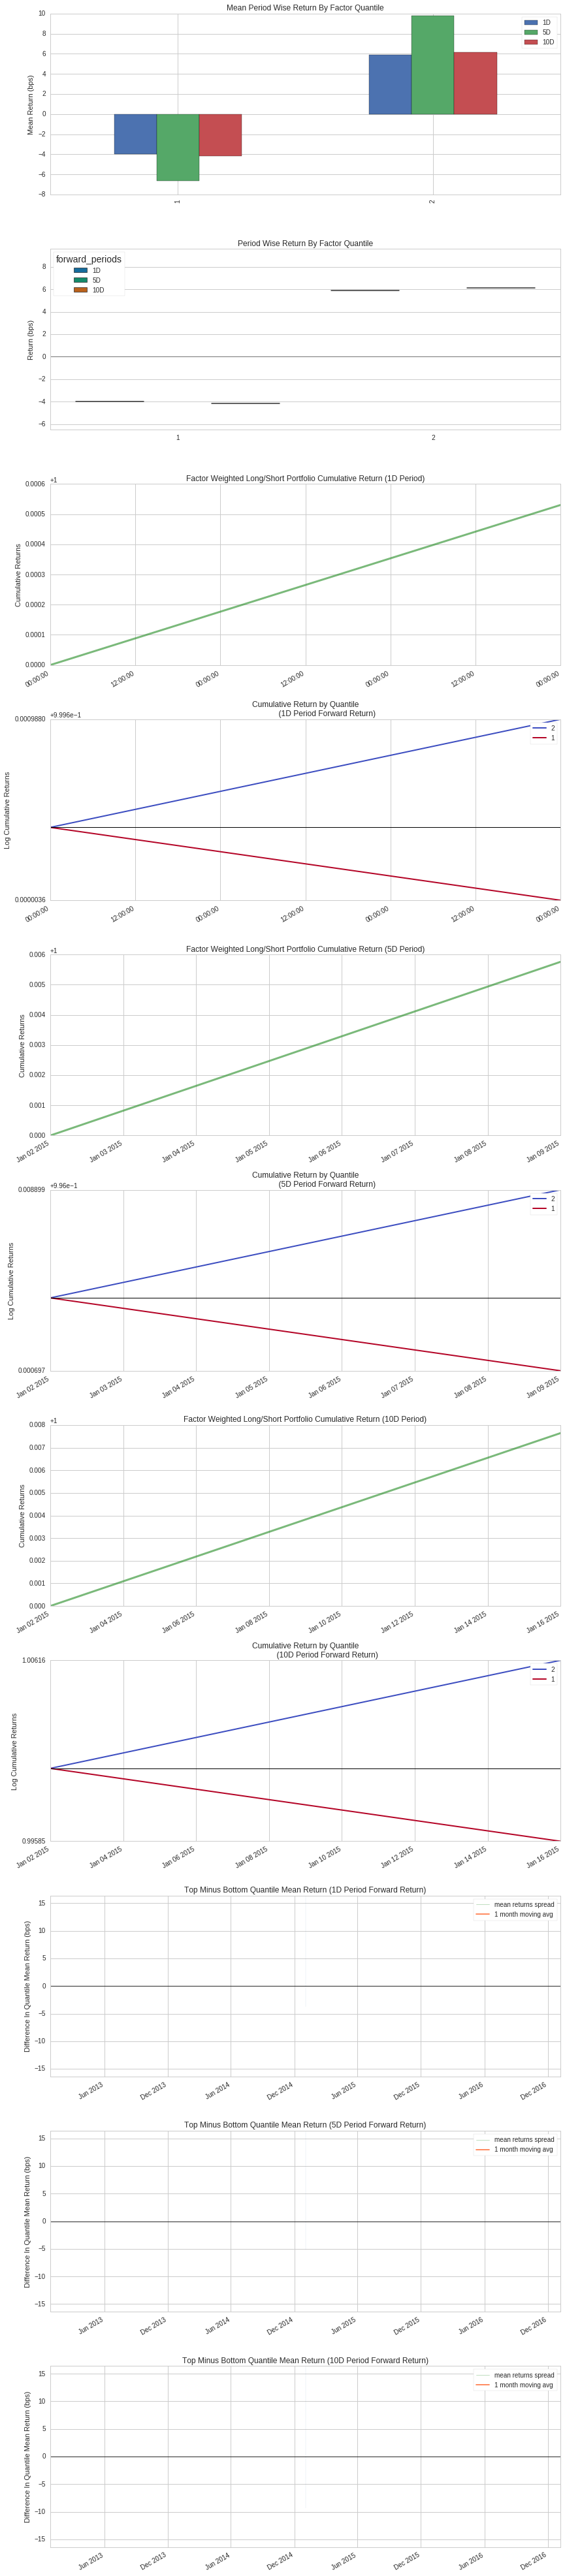

Information Analysis


,1D,5D,10D
IC Mean,0.025,0.054,0.067
IC Std.,NaN,NaN,NaN
Risk-Adjusted IC,NaN,NaN,NaN
t-stat(IC),NaN,NaN,NaN
p-value(IC),NaN,NaN,NaN
IC Skew,0.000,0.000,0.000
IC Kurtosis,-3.000,-3.000,-3.000


TypeError: len() of unsized object

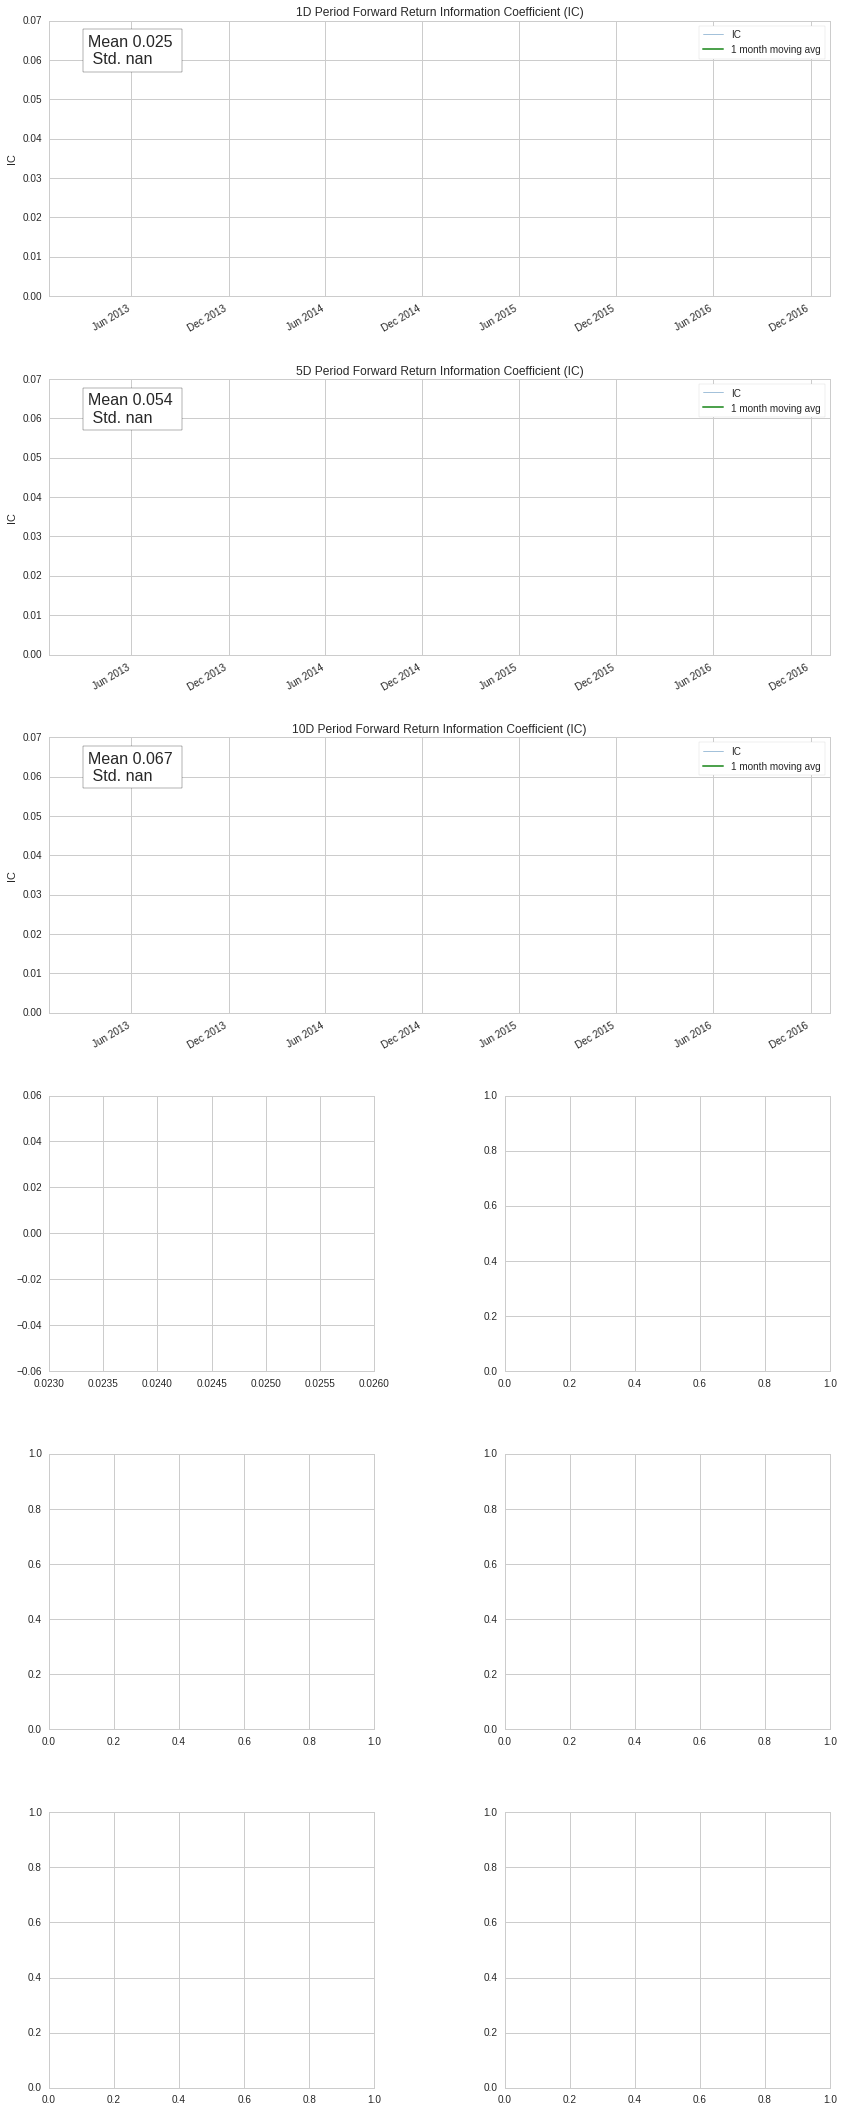

In [18]:
import alphalens

alphalens.tears.create_full_tear_sheet(factor_data)
